In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [79]:
data = pd.read_csv("dataset.csv")

In [81]:
data

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female
...,...,...,...
200,155.090314,77.248911,Female
201,149.175907,93.231692,Male
202,168.030874,63.640623,Female
203,172.608090,55.189983,Male


In [83]:
data.shape

(205, 3)

In [13]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [85]:
data.loc[data['Sex'] == 'Male', 'Sex'] = 1
data.loc[data['Sex'] == 'Female', 'Sex'] = 0

In [87]:
data

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0
...,...,...,...
200,155.090314,77.248911,0
201,149.175907,93.231692,1
202,168.030874,63.640623,0
203,172.608090,55.189983,1


In [19]:
data.head()


,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [89]:
X = data.drop(['Sex'], axis = 1)
y = data['Sex']

In [161]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [163]:
X

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108
...,...,...
200,0.420625,0.449099
201,0.343085,0.617901
202,0.590282,0.305375
203,0.650291,0.216123


In [165]:
y = y.astype('int')

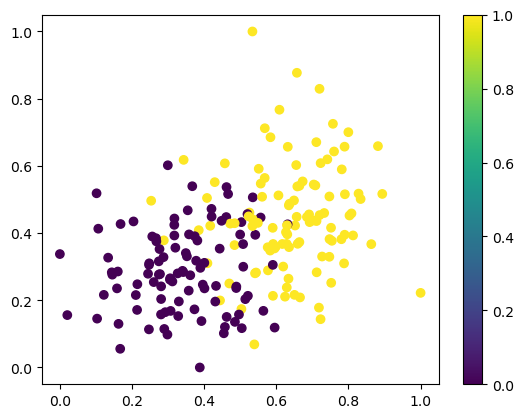

In [167]:
plt.scatter(X['Height'],X['Weight'], c=y)
plt.colorbar()
plt.show()

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

In [171]:
X_train.shape

(164, 2)

In [173]:
X_test.shape

(41, 2)

In [107]:
data.shape

(205, 3)

### Model Building

In [175]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu')  
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

# compile model

model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
              metrics = ['accuracy']
             )

#train model
epoch_number = 20
history = model.fit(X_train, y_train, epochs = epoch_number)

Epoch 1/20


C:\Users\erang\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5244 - loss: 0.6773
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5244 - loss: 0.6589
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5366 - loss: 0.6433
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5488 - loss: 0.6295
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6524 - loss: 0.6046
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7561 - loss: 0.5796
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7622 - loss: 0.5535
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7744 - loss: 0.5224
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7500 - loss: 0.5056
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8293 - loss: 0.4571
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8415 - loss: 0.4239
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8293 - loss: 0.3950
Epoch 13/20


### Option 2

In [194]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),  
    tf.keras.layers.Dense(2, activation='softmax')
    
])

# compile model

model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
              metrics = ['accuracy']
             )

#train model
epoch_number = 20
history = model.fit(X_train, y_train, epochs = epoch_number)

Epoch 1/20


C:\Users\erang\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5549 - loss: 0.6802
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5427 - loss: 0.6534
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5427 - loss: 0.6321
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5854 - loss: 0.6057
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6220 - loss: 0.5825
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7317 - loss: 0.5383
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8537 - loss: 0.5139
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8537 - loss: 0.4711
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8354 - loss: 0.4274  
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8659 - loss: 0.4028
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8537 - loss: 0.3759
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8415 - loss: 0.3456
Epoch 13/20

In [196]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,800 (14.85 KB)

 Trainable params: 1,266 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,534 (9.90 KB)

### ModeL Evaluation

In [198]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8780 - loss: 0.3113 


[0.31126102805137634, 0.8780487775802612]

In [200]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [210]:
y_pred[:5]

array([[0.82237715, 0.17762282],
       [0.01027638, 0.98972356],
       [0.00401128, 0.99598867],
       [0.61342025, 0.38657972],
       [0.01521695, 0.984783  ]], dtype=float32)

In [212]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [153]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int32

In [204]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

InvalidArgumentError: {{function_node __wrapped__LogicalAnd_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [1,41] vs. [1,82] [Op:LogicalAnd] name: 

In [ ]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<Axes: >

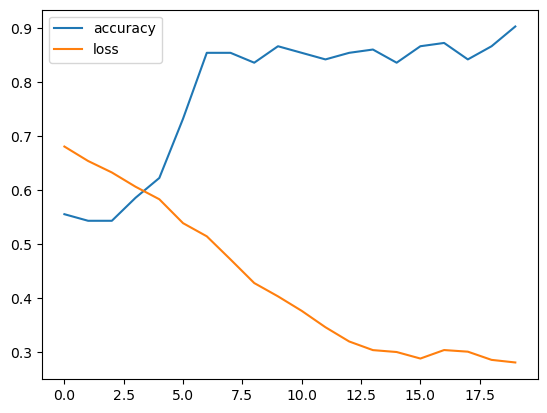

In [208]:

pd.DataFrame(history.history).plot()